## Music Popularity Prediction with Python

In [1]:
import pandas as pd
spotify_data = pd.read_csv("Spotify_data.csv")
print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [2]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [3]:
spotify_data.drop(columns=['Unnamed: 0'], inplace=True)
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

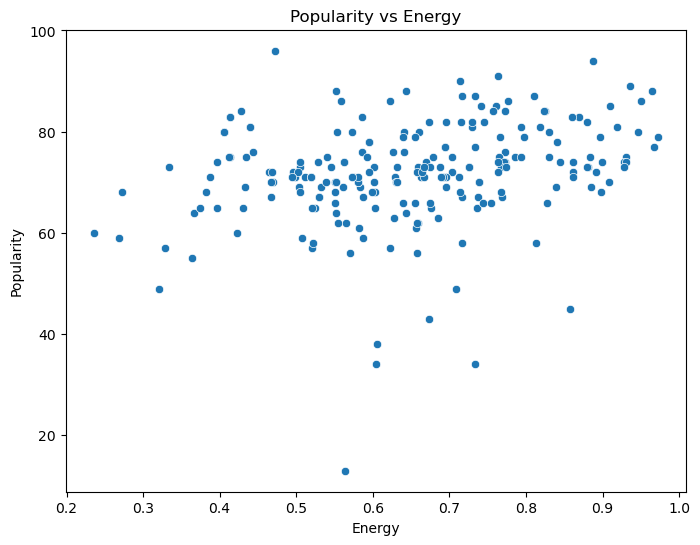

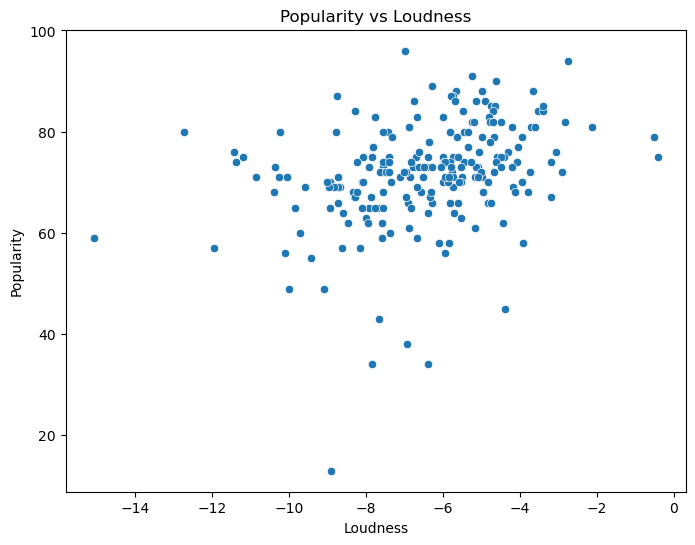

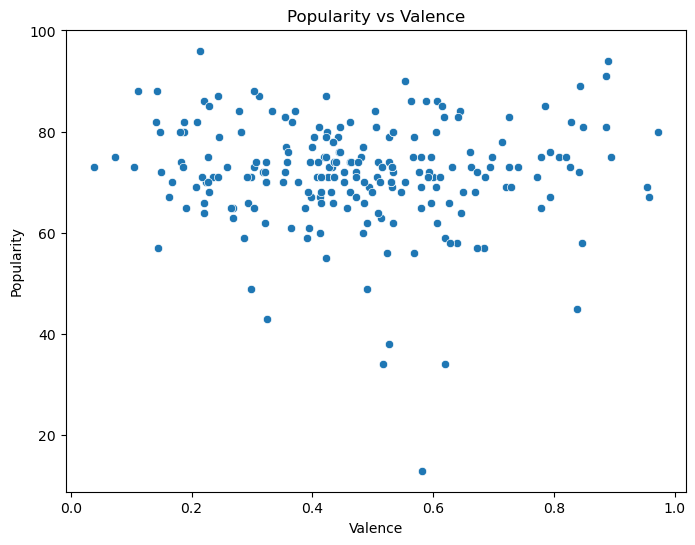

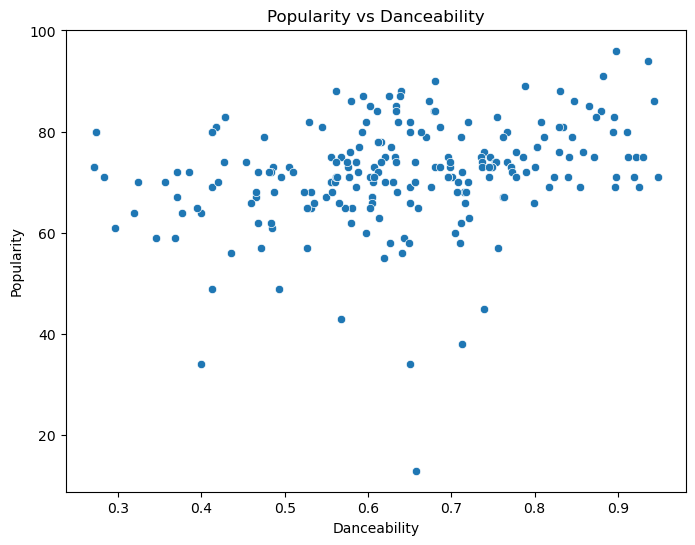

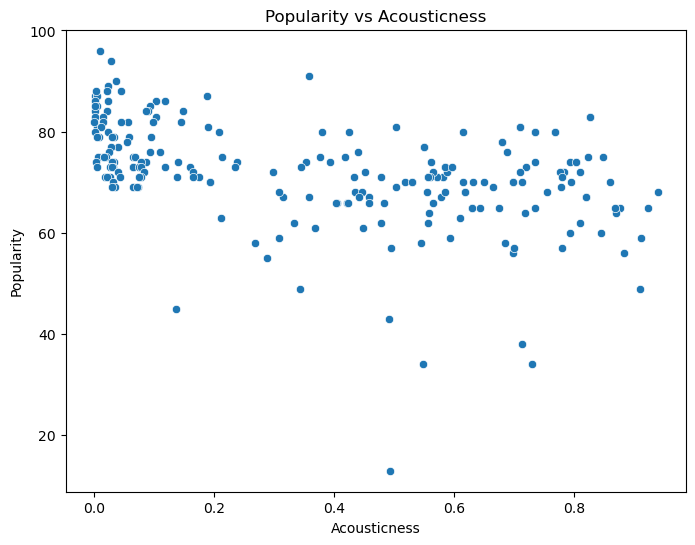

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Energy','Loudness','Valence','Danceability','Acousticness']
for feature in features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=spotify_data, x = feature, y = 'Popularity')
    plt.title(f"Popularity vs {feature}")
    plt.show()


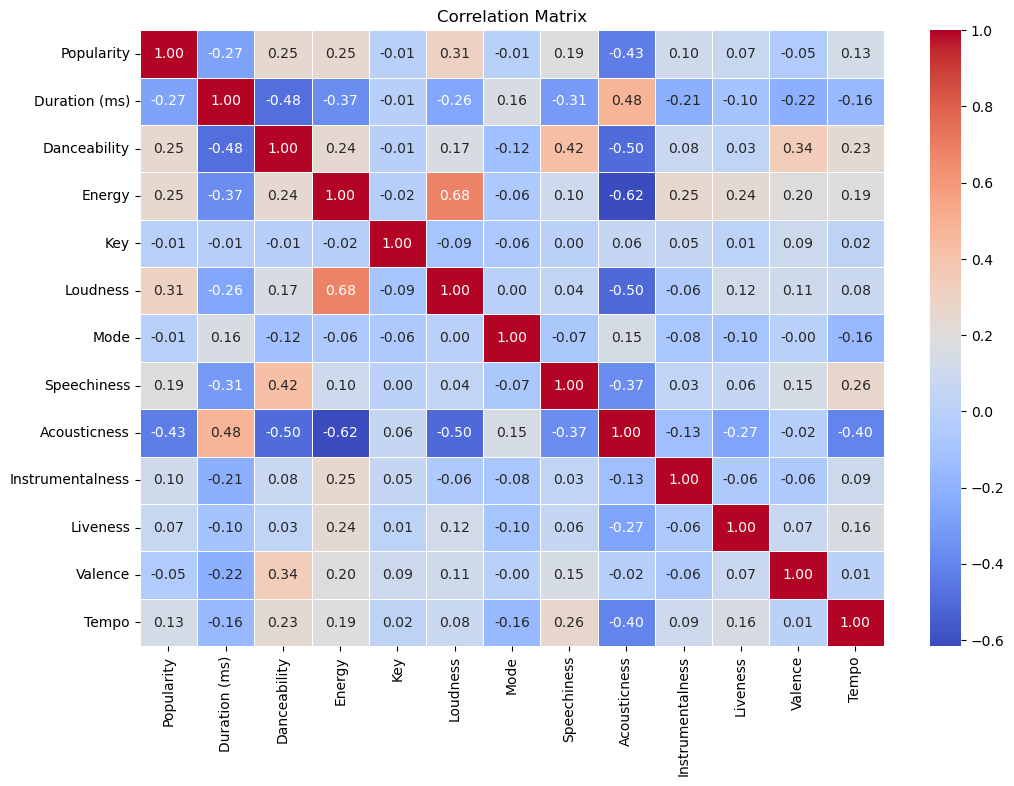

In [5]:
numeric_columns = spotify_data.select_dtypes(include= ['float64','int64']).columns
numeric_data = spotify_data[numeric_columns]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_matrix, annot=True, cmap = 'coolwarm',fmt='.2f', linewidths='0.5')
plt.title("Correlation Matrix")
plt.show()

In [6]:
import numpy as np
# 创建一个DataFrame
data = {
    'A': np.arange(1, 11),  # 1, 2, ..., 10 (完全线性)
    'B': np.arange(1, 11) * 2 + np.random.randn(10), # 与A强正相关
    'C': np.arange(1, 11) * -3 + np.random.randn(10), # 与A强负相关
    'D': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4] # 等级数据
}
df = pd.DataFrame(data)

print("原始数据:")
print(df)
print("\n" + "="*30 + "\n")

# 1. 计算 Pearson 相关系数 (默认)
print("Pearson Correlation Matrix:")
print(df.corr(method='pearson'))
print("\n" + "="*30 + "\n")

# 2. 计算 Spearman 相关系数
print("Spearman Correlation Matrix:")
print(df.corr(method='spearman'))
print("\n" + "="*30 + "\n")

# 3. 计算 Kendall 相关系数
print("Kendall Correlation Matrix:")
print(df.corr(method='kendall'))

原始数据:
    A          B          C  D
0   1   2.647060  -2.995668  1
1   2   5.223650  -6.769359  2
2   3   5.527380  -6.999218  2
3   4   6.561260 -12.280315  3
4   5   9.769344 -15.741769  3
5   6  14.032671 -17.489782  3
6   7  13.741087 -21.366020  4
7   8  17.012197 -23.644426  4
8   9  17.069794 -25.861015  4
9  10  20.476137 -30.773812  4


Pearson Correlation Matrix:
          A         B         C         D
A  1.000000  0.984707 -0.994990  0.940019
B  0.984707  1.000000 -0.982723  0.905008
C -0.994990 -0.982723  1.000000 -0.943863
D  0.940019  0.905008 -0.943863  1.000000


Spearman Correlation Matrix:
          A         B         C         D
A  1.000000  0.987879 -1.000000  0.953463
B  0.987879  1.000000 -0.987879  0.908968
C -1.000000 -0.987879  1.000000 -0.953463
D  0.953463  0.908968 -0.953463  1.000000


Kendall Correlation Matrix:
          A         B         C         D
A  1.000000  0.955556 -1.000000  0.881917
B  0.955556  1.000000 -0.955556  0.831522
C -1.000000 -0.9

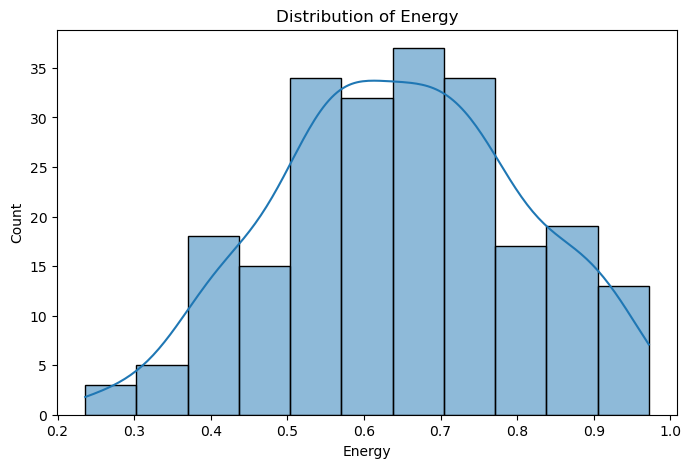

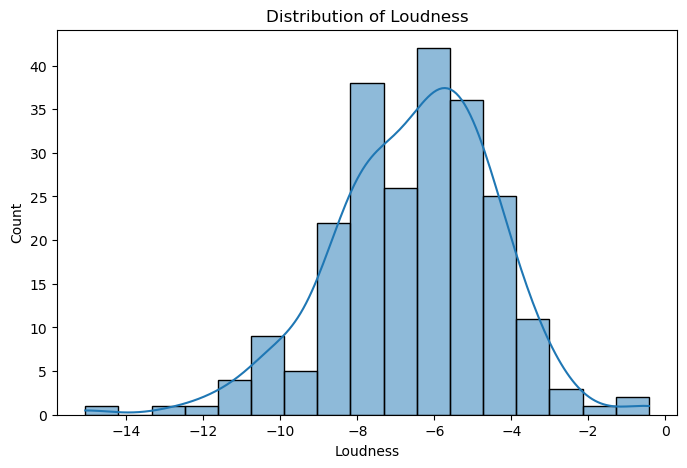

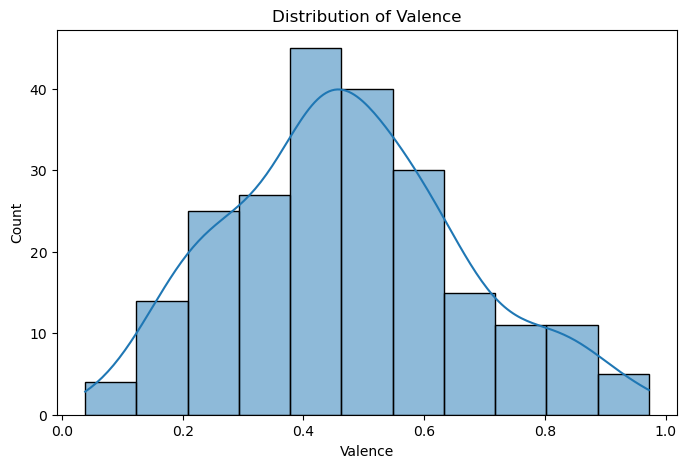

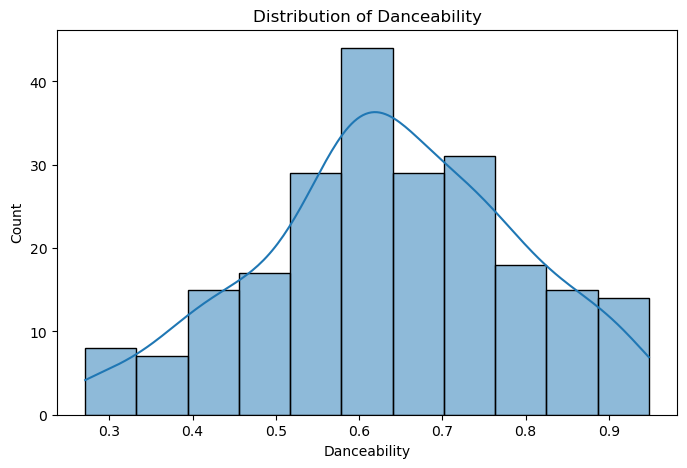

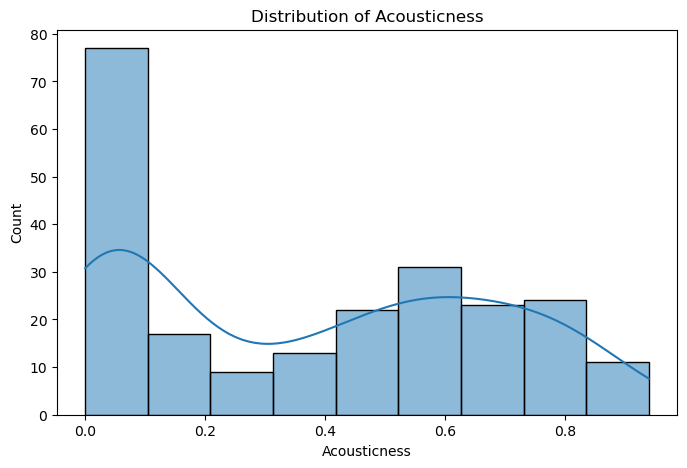

In [7]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

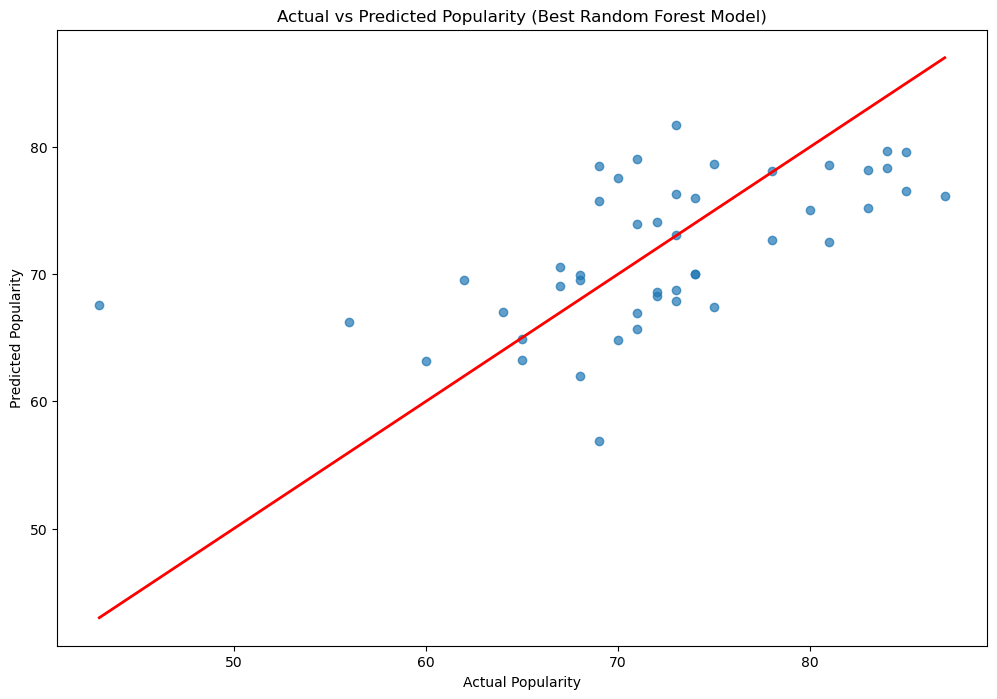

In [8]:
# Import necessary libraries
# train_test_split is for splitting the dataset into training and testing sets
# GridSearchCV is for finding the best hyperparameters using cross-validation
# StandardScaler is for feature standardization
# RandomForestRegressor is the machine learning model we will use
# mean_squared_error and r2_score are for evaluating the model's performance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Assume matplotlib.pyplot has been imported as plt
import matplotlib.pyplot as plt
# Assume pandas has been imported as pd and spotify_data is already loaded
# import pandas as pd
# spotify_data = pd.read_csv('your_data.csv')

#* 1. Choosing the features and target variable
# The 'features' list contains the independent variables we will use for prediction
features = ['Energy','Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
# X stores the feature data (independent variables)
X = spotify_data[features]
# y stores the target variable we want to predict (song popularity)
y = spotify_data['Popularity']

#* 2. Split the data into training and testing sets
# This splits the dataset, allocating 20% to the test set
# random_state=42 ensures that the split is the same every time, for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#* 3. Normalize the features
# Create a StandardScaler object
scalar = StandardScaler()
# Fit the scaler on the training data and transform it (calculates mean/std and applies scaling)
X_train_scaled = scalar.fit_transform(X_train)
# Transform the test data using the mean and std deviation calculated from the training data to prevent data leakage
X_test_scaled = scalar.transform(X_test)

#* 4. Define the parameter grid for the Random Forest model
# This dictionary contains the hyperparameters that GridSearchCV will test
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # The number of features to consider when looking for the best split
    'max_depth': [10, 20, 30, None],       # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # The minimum number of samples required to be at a leaf node
}

#* 5. Initialize and run the Grid Search
# Create the GridSearchCV object
# estimator: the model to tune (RandomForestRegressor)
# param_grid: the dictionary of parameters to test
# refit=True: refits the best model on the entire training set after finding the best parameters
# verbose=2: prints detailed progress messages
# cv=5: uses 5-fold cross-validation
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)
# Fit the GridSearchCV object to the scaled training data to start the search
grid_search_rf.fit(X_train_scaled, y_train)

#* 6. Get the best parameters and the best model
# Extract the best combination of parameters found by the search
best_params_rf = grid_search_rf.best_params_
# Get the best estimator (model) that has been refit on the entire training data
best_rf_model = grid_search_rf.best_estimator_

# Print the details of the best model
print(best_rf_model)

#* 7. Make predictions using the best model
# Use the best model to predict the popularity on the scaled test set
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

#* 8. Visualize the results
# Create a new figure for the plot with a specified size
plt.figure(figsize=(12, 8))
# Create a scatter plot of actual vs. predicted values
# x-axis: actual popularity (y_test), y-axis: predicted popularity (y_pred_best_rf)
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
# Plot a red diagonal line (y=x), which represents a perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

# Set the labels for the axes and the title for the plot
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
# Display the plot
plt.show()